In [1]:
#Importamos las carpetas que vamos a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Leemos el archivo que vamos a utilizar en la actividad.
df0 = pd.read_csv("vid18_180219.dat")

In [3]:
#Ahora, con la lectura del archivo creamos un DataFrame.
df1 = pd.DataFrame(df0) 

#Y otro DataFrame especial con las columnas que vamos a utilizar.
df2=df1[['TIMESTAMP','AirTC_Avg']] 
df = pd.DataFrame(df2) 

#Imprimimos la cabeza y final del archivo.
df.head(), df.tail()

(             TIMESTAMP  AirTC_Avg
 0  2018-05-11 20:10:00      23.50
 1  2018-05-11 20:20:00      22.96
 2  2018-05-11 20:30:00      22.73
 3  2018-05-11 20:40:00      22.40
 4  2018-05-11 20:50:00      22.46,                  TIMESTAMP  AirTC_Avg
 40655  2019-02-18 06:50:00      3.699
 40656  2019-02-18 07:00:00      3.492
 40657  2019-02-18 07:10:00      3.387
 40658  2019-02-18 07:20:00      3.243
 40659  2019-02-18 07:30:00      3.552)

In [4]:
#Leemos los tipos de variables para despues, trabajar con ellas.
df.dtypes

TIMESTAMP     object
AirTC_Avg    float64
dtype: object

In [5]:
#Ahora convertiremos las variables TimeStamp a variables fecha.
df['TIMESTAMP'] = pd.to_datetime(df.apply(lambda x: x['TIMESTAMP'],1), dayfirst=True)


df['Año']=df['TIMESTAMP'].dt.year 
df['Mes']=df['TIMESTAMP'].dt.month 
df['Dia']=df['TIMESTAMP'].dt.day
df['Hora']=df['TIMESTAMP'].dt.hour

In [6]:
#Creamos un DataFrame que comience el conteo a partir del 1 de Noviembre, y lo reinicimos para volveerlo a utilizar.

uf = pd.DataFrame(df[df['TIMESTAMP']>="2018-11-1"])
uf = uf.reset_index(drop=True)
uf.tail()

,TIMESTAMP,AirTC_Avg,Año,Mes,Dia,Hora
15720,2019-02-18 06:50:00,3.699,2019,2,18,6
15721,2019-02-18 07:00:00,3.492,2019,2,18,7
15722,2019-02-18 07:10:00,3.387,2019,2,18,7
15723,2019-02-18 07:20:00,3.243,2019,2,18,7
15724,2019-02-18 07:30:00,3.552,2019,2,18,7


In [7]:
#Añadimos las columnas con el promedio por hora de la temperatura y de las temperaturas maxima y minima por dia.
uf["Tprom"]=round(uf.groupby(['Año','Mes','Dia','Hora']).transform(np.mean),1)
uf["Tmax"]=round(uf.groupby(['Año','Mes','Dia'])['Tprom'].transform(np.max),1)
uf["Tmin"]=round(uf.groupby(['Año','Mes','Dia'])['Tprom'].transform(np.min),1)

#Imprimimos la cabeza y final del archivo.
df.head(), df.tail()

(            TIMESTAMP  AirTC_Avg   Año  Mes  Dia  Hora
 0 2018-05-11 20:10:00      23.50  2018    5   11    20
 1 2018-05-11 20:20:00      22.96  2018    5   11    20
 2 2018-05-11 20:30:00      22.73  2018    5   11    20
 3 2018-05-11 20:40:00      22.40  2018    5   11    20
 4 2018-05-11 20:50:00      22.46  2018    5   11    20,
                 TIMESTAMP  AirTC_Avg   Año  Mes  Dia  Hora
 40655 2019-02-18 06:50:00      3.699  2019    2   18     6
 40656 2019-02-18 07:00:00      3.492  2019    2   18     7
 40657 2019-02-18 07:10:00      3.387  2019    2   18     7
 40658 2019-02-18 07:20:00      3.243  2019    2   18     7
 40659 2019-02-18 07:30:00      3.552  2019    2   18     7)

In [8]:
uf=uf.drop(['TIMESTAMP','AirTC_Avg'],1)

#Imprimimos la cabeza y final del archivo.
df.head(), df.tail()

(            TIMESTAMP  AirTC_Avg   Año  Mes  Dia  Hora
 0 2018-05-11 20:10:00      23.50  2018    5   11    20
 1 2018-05-11 20:20:00      22.96  2018    5   11    20
 2 2018-05-11 20:30:00      22.73  2018    5   11    20
 3 2018-05-11 20:40:00      22.40  2018    5   11    20
 4 2018-05-11 20:50:00      22.46  2018    5   11    20,
                 TIMESTAMP  AirTC_Avg   Año  Mes  Dia  Hora
 40655 2019-02-18 06:50:00      3.699  2019    2   18     6
 40656 2019-02-18 07:00:00      3.492  2019    2   18     7
 40657 2019-02-18 07:10:00      3.387  2019    2   18     7
 40658 2019-02-18 07:20:00      3.243  2019    2   18     7
 40659 2019-02-18 07:30:00      3.552  2019    2   18     7)

In [9]:
uf=uf.drop_duplicates(subset=['Año','Mes','Dia','Hora'])
uf = uf.reset_index(drop=True)

#Imprimimos la cabeza y final del archivo.
df.head(), df.tail()

(            TIMESTAMP  AirTC_Avg   Año  Mes  Dia  Hora
 0 2018-05-11 20:10:00      23.50  2018    5   11    20
 1 2018-05-11 20:20:00      22.96  2018    5   11    20
 2 2018-05-11 20:30:00      22.73  2018    5   11    20
 3 2018-05-11 20:40:00      22.40  2018    5   11    20
 4 2018-05-11 20:50:00      22.46  2018    5   11    20,
                 TIMESTAMP  AirTC_Avg   Año  Mes  Dia  Hora
 40655 2019-02-18 06:50:00      3.699  2019    2   18     6
 40656 2019-02-18 07:00:00      3.492  2019    2   18     7
 40657 2019-02-18 07:10:00      3.387  2019    2   18     7
 40658 2019-02-18 07:20:00      3.243  2019    2   18     7
 40659 2019-02-18 07:30:00      3.552  2019    2   18     7)

In [10]:
#Creamos un Loop para las unidades de frio por dia.

UF=[]
for i in range (0,len(uf)):
    if(uf['Tprom'][i]< 1.5):
        UF.append(0)
    elif(1.5<=uf['Tprom'][i]<2.5):
        UF.append(0.5)
    elif(2.5<=uf['Tprom'][i]<9.2):
        UF.append(1.0)
    elif(9.2<=uf['Tprom'][i]<12.5):
        UF.append(0.5)
    elif(12.5<=uf['Tprom'][i]<16):
        UF.append(0.0)
    elif(16<=uf['Tprom'][i]<18):
        UF.append(-0.5)
    elif(uf['Tprom'][i]>=18):
        UF.append(-1.0)
uf['UF']=UF

#Imprimimos la cabeza y el final del archivo.
uf.head(), uf.tail()

(    Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF
 0  2018   11    1     0    8.7  28.6   6.8  1.0
 1  2018   11    1     1    8.5  28.6   6.8  1.0
 2  2018   11    1     2    8.7  28.6   6.8  1.0
 3  2018   11    1     3    8.8  28.6   6.8  1.0
 4  2018   11    1     4    7.4  28.6   6.8  1.0,
        Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF
 2618  2019    2   18     3    5.4   6.8   3.4  1.0
 2619  2019    2   18     4    4.7   6.8   3.4  1.0
 2620  2019    2   18     5    4.2   6.8   3.4  1.0
 2621  2019    2   18     6    3.7   6.8   3.4  1.0
 2622  2019    2   18     7    3.4   6.8   3.4  1.0)

In [11]:
#Sumamos el valor de las unidades de frio por dia.

uf["UF24"]=uf.groupby(['Año','Mes','Dia'])['UF'].transform("sum")
uf.head(), uf.tail()

(    Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 0  2018   11    1     0    8.7  28.6   6.8  1.0  -0.5
 1  2018   11    1     1    8.5  28.6   6.8  1.0  -0.5
 2  2018   11    1     2    8.7  28.6   6.8  1.0  -0.5
 3  2018   11    1     3    8.8  28.6   6.8  1.0  -0.5
 4  2018   11    1     4    7.4  28.6   6.8  1.0  -0.5,
        Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 2618  2019    2   18     3    5.4   6.8   3.4  1.0   8.0
 2619  2019    2   18     4    4.7   6.8   3.4  1.0   8.0
 2620  2019    2   18     5    4.2   6.8   3.4  1.0   8.0
 2621  2019    2   18     6    3.7   6.8   3.4  1.0   8.0
 2622  2019    2   18     7    3.4   6.8   3.4  1.0   8.0)

In [12]:
uf24 = pd.DataFrame(uf.drop_duplicates(['Año','Mes','Dia']))
uf24.head(), uf24.tail()

(     Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 0   2018   11    1     0    8.7  28.6   6.8  1.0  -0.5
 24  2018   11    2     0   10.6  31.0  10.2  0.5  -9.0
 48  2018   11    3     0   12.5  30.0  10.5  0.0  -9.5
 72  2018   11    4     0   12.7  31.2  11.7  0.0 -11.5
 96  2018   11    5     0   13.9  31.1  11.4  0.0  -8.0,
        Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 2519  2019    2   14     0   11.2  28.6   9.6  0.5 -11.0
 2543  2019    2   15     0   18.7  27.2  15.0 -1.0 -20.5
 2567  2019    2   16     0   12.7  23.3   6.7  0.0  -4.5
 2591  2019    2   17     0   11.0  20.8   3.8  0.5   2.5
 2615  2019    2   18     0    6.8   6.8   3.4  1.0   8.0)

In [13]:
uf24=uf24.drop(['Hora','UF'],1)
uf24.head(), uf24.tail()

(     Año  Mes  Dia  Tprom  Tmax  Tmin  UF24
 0   2018   11    1    8.7  28.6   6.8  -0.5
 24  2018   11    2   10.6  31.0  10.2  -9.0
 48  2018   11    3   12.5  30.0  10.5  -9.5
 72  2018   11    4   12.7  31.2  11.7 -11.5
 96  2018   11    5   13.9  31.1  11.4  -8.0,
        Año  Mes  Dia  Tprom  Tmax  Tmin  UF24
 2519  2019    2   14   11.2  28.6   9.6 -11.0
 2543  2019    2   15   18.7  27.2  15.0 -20.5
 2567  2019    2   16   12.7  23.3   6.7  -4.5
 2591  2019    2   17   11.0  20.8   3.8   2.5
 2615  2019    2   18    6.8   6.8   3.4   8.0)

In [14]:
#Reiniciamos de nuevo el indice, para utilizarlo despues.
uf = uf.reset_index(drop=True) 
uf.head(), uf.tail()

(    Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 0  2018   11    1     0    8.7  28.6   6.8  1.0  -0.5
 1  2018   11    1     1    8.5  28.6   6.8  1.0  -0.5
 2  2018   11    1     2    8.7  28.6   6.8  1.0  -0.5
 3  2018   11    1     3    8.8  28.6   6.8  1.0  -0.5
 4  2018   11    1     4    7.4  28.6   6.8  1.0  -0.5,
        Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 2618  2019    2   18     3    5.4   6.8   3.4  1.0   8.0
 2619  2019    2   18     4    4.7   6.8   3.4  1.0   8.0
 2620  2019    2   18     5    4.2   6.8   3.4  1.0   8.0
 2621  2019    2   18     6    3.7   6.8   3.4  1.0   8.0
 2622  2019    2   18     7    3.4   6.8   3.4  1.0   8.0)

In [15]:
#Creamos una columna para aalmacenar la suma de las unidades de frio por dia.
uf24['Sum_UF24']=np.cumsum(uf24['UF24'])
uf24 = uf24.reset_index(drop=True) 
uf24.head(), uf24.tail()

(    Año  Mes  Dia  Tprom  Tmax  Tmin  UF24  Sum_UF24
 0  2018   11    1    8.7  28.6   6.8  -0.5      -0.5
 1  2018   11    2   10.6  31.0  10.2  -9.0      -9.5
 2  2018   11    3   12.5  30.0  10.5  -9.5     -19.0
 3  2018   11    4   12.7  31.2  11.7 -11.5     -30.5
 4  2018   11    5   13.9  31.1  11.4  -8.0     -38.5,
       Año  Mes  Dia  Tprom  Tmax  Tmin  UF24  Sum_UF24
 105  2019    2   14   11.2  28.6   9.6 -11.0    -267.5
 106  2019    2   15   18.7  27.2  15.0 -20.5    -288.0
 107  2019    2   16   12.7  23.3   6.7  -4.5    -292.5
 108  2019    2   17   11.0  20.8   3.8   2.5    -290.0
 109  2019    2   18    6.8   6.8   3.4   8.0    -282.0)

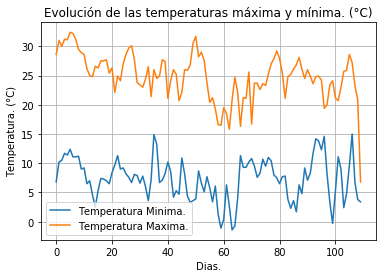

In [16]:
#Grafica de temperaturas maxima y minima. 
x=np.arange(len(uf24['Dia']))
y1=uf24['Tmin']
y2=uf24['Tmax']
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Temperatura Minima.","Temperatura Maxima."],loc='best')
plt.title("Evolución de las temperaturas máxima y mínima. (°C)")
plt.ylabel("Temperatura. (°C)")
plt.xlabel("Dias.")
plt.grid(True)
plt.show()

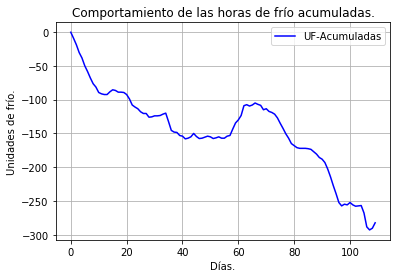

In [17]:
#Grafica de horas de frio acumuladas.
x=np.arange(len(uf24['Dia']))
y=uf24['Sum_UF24']
plt.plot(x, y,color='B')
plt.legend(["UF-Acumuladas"],loc='best')
plt.title("Comportamiento de las horas de frío acumuladas.")
plt.ylabel("Unidades de frío.")
plt.xlabel("Días.")
plt.grid(True)
plt.show()

In [18]:
#Ahora, creamos un nuevo DataFrame partiendo de uno previo.
nv=pd.DataFrame(uf)
nv.head(), nv.tail()

(    Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 0  2018   11    1     0    8.7  28.6   6.8  1.0  -0.5
 1  2018   11    1     1    8.5  28.6   6.8  1.0  -0.5
 2  2018   11    1     2    8.7  28.6   6.8  1.0  -0.5
 3  2018   11    1     3    8.8  28.6   6.8  1.0  -0.5
 4  2018   11    1     4    7.4  28.6   6.8  1.0  -0.5,
        Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24
 2618  2019    2   18     3    5.4   6.8   3.4  1.0   8.0
 2619  2019    2   18     4    4.7   6.8   3.4  1.0   8.0
 2620  2019    2   18     5    4.2   6.8   3.4  1.0   8.0
 2621  2019    2   18     6    3.7   6.8   3.4  1.0   8.0
 2622  2019    2   18     7    3.4   6.8   3.4  1.0   8.0)

In [19]:
#Ahora cremos otro Loop para realizar un conteo de las horas frias y calientes que hay por hora.

HF=[] 
HC=[] 

for j in range(0,len(nv)):
    if(0<nv['Tprom'][j] <= 10):
        HF.append(1) 
        HC.append(0) 
    elif(nv['Tprom'][j] >= 25): 
        HF.append(0) 
        HC.append(1) 
    else:  
        HC.append(0)
        HF.append(0)
        
#Agregamos los valores del loop en una nueva columna del DataFrame, e imprimimos la cabecera del archivo.
nv['HC']=HC 
nv['HF']=HF
nv.head(12)

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF,UF24,HC,HF
0,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5,0,1
1,2018,11,1,1,8.5,28.6,6.8,1.0,-0.5,0,1
2,2018,11,1,2,8.7,28.6,6.8,1.0,-0.5,0,1
3,2018,11,1,3,8.8,28.6,6.8,1.0,-0.5,0,1
4,2018,11,1,4,7.4,28.6,6.8,1.0,-0.5,0,1
5,2018,11,1,5,7.3,28.6,6.8,1.0,-0.5,0,1
6,2018,11,1,6,6.8,28.6,6.8,1.0,-0.5,0,1
7,2018,11,1,7,8.1,28.6,6.8,1.0,-0.5,0,1
8,2018,11,1,8,15.0,28.6,6.8,0.0,-0.5,0,0
9,2018,11,1,9,19.7,28.6,6.8,-1.0,-0.5,0,0


In [20]:
#Agrupamos las horas calientes y horas frias en sus respetivos grupos para sumarlos
#y asi obtener el total en un dia.

nv["HC24"]=nv.groupby(['Año','Mes','Dia'])['HC'].transform("sum")
nv["HF24"]=nv.groupby(['Año','Mes','Dia'])['HF'].transform("sum") 


nv.head(), nv.tail()

(    Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24  HC  HF  HC24  HF24
 0  2018   11    1     0    8.7  28.6   6.8  1.0  -0.5   0   1     6     8
 1  2018   11    1     1    8.5  28.6   6.8  1.0  -0.5   0   1     6     8
 2  2018   11    1     2    8.7  28.6   6.8  1.0  -0.5   0   1     6     8
 3  2018   11    1     3    8.8  28.6   6.8  1.0  -0.5   0   1     6     8
 4  2018   11    1     4    7.4  28.6   6.8  1.0  -0.5   0   1     6     8,
        Año  Mes  Dia  Hora  Tprom  Tmax  Tmin   UF  UF24  HC  HF  HC24  HF24
 2618  2019    2   18     3    5.4   6.8   3.4  1.0   8.0   0   1     0     8
 2619  2019    2   18     4    4.7   6.8   3.4  1.0   8.0   0   1     0     8
 2620  2019    2   18     5    4.2   6.8   3.4  1.0   8.0   0   1     0     8
 2621  2019    2   18     6    3.7   6.8   3.4  1.0   8.0   0   1     0     8
 2622  2019    2   18     7    3.4   6.8   3.4  1.0   8.0   0   1     0     8)

In [21]:
#Ahora nos deshacemos de los valores repetidospor dia y de las columnas que ya no usareemos.

nv= nv.drop_duplicates(subset=['Año','Mes','Dia']) 
nv= nv.drop(['HC','HF','Hora'],1) 
nv= nv.reset_index(drop=True)
nv.head(), nv.tail()

(    Año  Mes  Dia  Tprom  Tmax  Tmin   UF  UF24  HC24  HF24
 0  2018   11    1    8.7  28.6   6.8  1.0  -0.5     6     8
 1  2018   11    2   10.6  31.0  10.2  0.5  -9.0     8     0
 2  2018   11    3   12.5  30.0  10.5  0.0  -9.5     8     0
 3  2018   11    4   12.7  31.2  11.7  0.0 -11.5     8     0
 4  2018   11    5   13.9  31.1  11.4  0.0  -8.0     8     0,
       Año  Mes  Dia  Tprom  Tmax  Tmin   UF  UF24  HC24  HF24
 105  2019    2   14   11.2  28.6   9.6  0.5 -11.0     7     1
 106  2019    2   15   18.7  27.2  15.0 -1.0 -20.5     5     0
 107  2019    2   16   12.7  23.3   6.7  0.0  -4.5     0     4
 108  2019    2   17   11.0  20.8   3.8  0.5   2.5     0    10
 109  2019    2   18    6.8   6.8   3.4  1.0   8.0     0     8)

In [22]:
#Ahora calcularemos las horas frias efectivas de la siguiente manera.
#A las horas frias que hay en 24 horas le restaremos las horas calientes que hay en un dia.

nv['HFE']= nv['HF24'] - nv['HC24']
nv.head(), nv.tail()

(    Año  Mes  Dia  Tprom  Tmax  Tmin   UF  UF24  HC24  HF24  HFE
 0  2018   11    1    8.7  28.6   6.8  1.0  -0.5     6     8    2
 1  2018   11    2   10.6  31.0  10.2  0.5  -9.0     8     0   -8
 2  2018   11    3   12.5  30.0  10.5  0.0  -9.5     8     0   -8
 3  2018   11    4   12.7  31.2  11.7  0.0 -11.5     8     0   -8
 4  2018   11    5   13.9  31.1  11.4  0.0  -8.0     8     0   -8,
       Año  Mes  Dia  Tprom  Tmax  Tmin   UF  UF24  HC24  HF24  HFE
 105  2019    2   14   11.2  28.6   9.6  0.5 -11.0     7     1   -6
 106  2019    2   15   18.7  27.2  15.0 -1.0 -20.5     5     0   -5
 107  2019    2   16   12.7  23.3   6.7  0.0  -4.5     0     4    4
 108  2019    2   17   11.0  20.8   3.8  0.5   2.5     0    10   10
 109  2019    2   18    6.8   6.8   3.4  1.0   8.0     0     8    8)

In [23]:
#Volveremos a crear un nuevo DataFrame basandonos en el anterior para trabajar con los valores por dia de cada variable.

mm=pd.DataFrame(uf24)
mm['HFE']=nv['HFE']
mm.head(),mm.tail()

(    Año  Mes  Dia  Tprom  Tmax  Tmin  UF24  Sum_UF24  HFE
 0  2018   11    1    8.7  28.6   6.8  -0.5      -0.5    2
 1  2018   11    2   10.6  31.0  10.2  -9.0      -9.5   -8
 2  2018   11    3   12.5  30.0  10.5  -9.5     -19.0   -8
 3  2018   11    4   12.7  31.2  11.7 -11.5     -30.5   -8
 4  2018   11    5   13.9  31.1  11.4  -8.0     -38.5   -8,
       Año  Mes  Dia  Tprom  Tmax  Tmin  UF24  Sum_UF24  HFE
 105  2019    2   14   11.2  28.6   9.6 -11.0    -267.5   -6
 106  2019    2   15   18.7  27.2  15.0 -20.5    -288.0   -5
 107  2019    2   16   12.7  23.3   6.7  -4.5    -292.5    4
 108  2019    2   17   11.0  20.8   3.8   2.5    -290.0   10
 109  2019    2   18    6.8   6.8   3.4   8.0    -282.0    8)

In [24]:
#Realizamos la suma acumulativa de las horas frias efectivas.
mm['Sum_HFE']=np.cumsum(mm['HFE'])
mm.head(), mm.tail()

(    Año  Mes  Dia  Tprom  Tmax  Tmin  UF24  Sum_UF24  HFE  Sum_HFE
 0  2018   11    1    8.7  28.6   6.8  -0.5      -0.5    2        2
 1  2018   11    2   10.6  31.0  10.2  -9.0      -9.5   -8       -6
 2  2018   11    3   12.5  30.0  10.5  -9.5     -19.0   -8      -14
 3  2018   11    4   12.7  31.2  11.7 -11.5     -30.5   -8      -22
 4  2018   11    5   13.9  31.1  11.4  -8.0     -38.5   -8      -30,
       Año  Mes  Dia  Tprom  Tmax  Tmin  UF24  Sum_UF24  HFE  Sum_HFE
 105  2019    2   14   11.2  28.6   9.6 -11.0    -267.5   -6      346
 106  2019    2   15   18.7  27.2  15.0 -20.5    -288.0   -5      341
 107  2019    2   16   12.7  23.3   6.7  -4.5    -292.5    4      345
 108  2019    2   17   11.0  20.8   3.8   2.5    -290.0   10      355
 109  2019    2   18    6.8   6.8   3.4   8.0    -282.0    8      363)

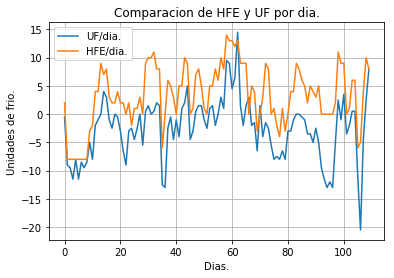

In [25]:
#Grafica de temperaturas maxima y minima. 
x=np.arange(len(mm['Dia'])) 
y1=mm['UF24'] 
y2=mm['HFE']
plt.plot(x, y1) 
plt.plot(x, y2)
plt.legend(["UF/dia.","HFE/dia."],loc='best') 
plt.title("Comparacion de HFE y UF por dia.")
plt.ylabel("Unidades de frio.")
plt.xlabel("Dias.") 
plt.grid(True)
plt.show()

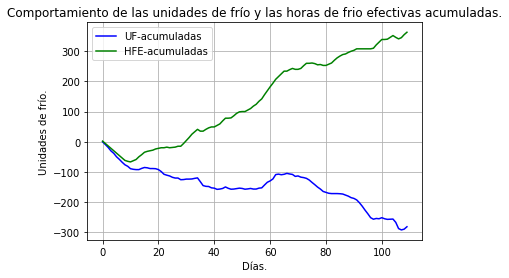

In [26]:
#Grafica de las horas de frio acumuladas.
x=np.arange(len(mm['Dia']))
y1=mm['Sum_UF24'] 
y2=mm['Sum_HFE'] 
plt.plot(x, y1,color='B') 
plt.plot(x, y2,color='G')
plt.legend(["UF-acumuladas","HFE-acumuladas"],loc='best') 
plt.title("Comportamiento de las unidades de frío y las horas de frio efectivas acumuladas.") 
plt.ylabel("Unidades de frío.") 
plt.xlabel("Días.") 
plt.grid(True)
plt.show()